**1. Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Import the dataset**

In [2]:
dataset=pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Drop columns with too many missing values
dataset.drop(['Cabin'], axis=1, inplace=True)
# Impute missing values
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**4. Data visualization**

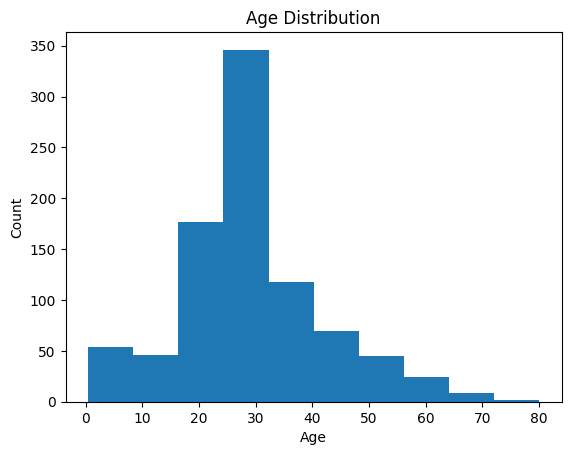

In [11]:
# Histogram of age
plt.hist(dataset['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

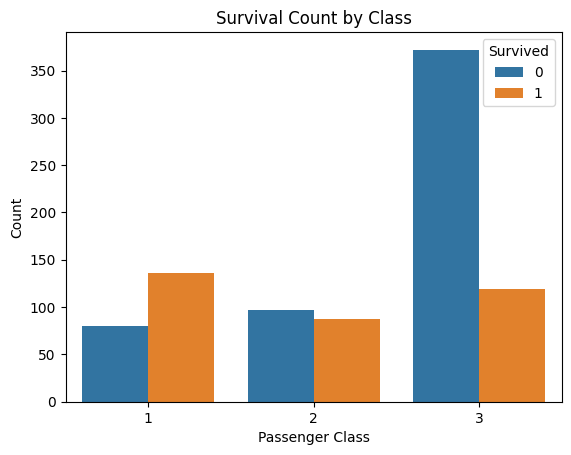

In [13]:
# Survival Count by Class
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Class')
plt.show()

<ipython-input-14-ed6475bce694>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


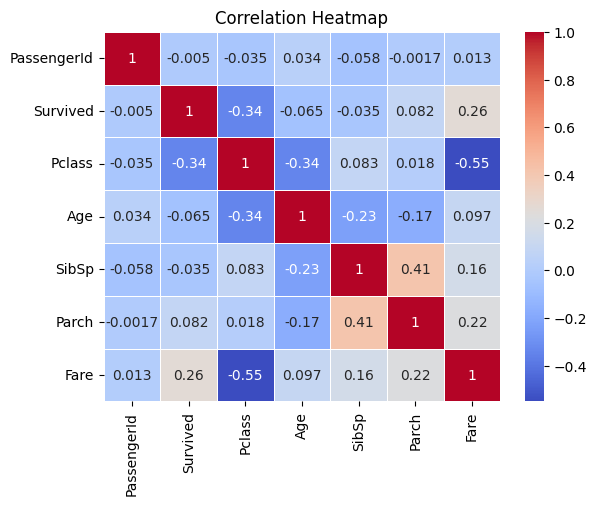

In [14]:
# Correlation Heatmap
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

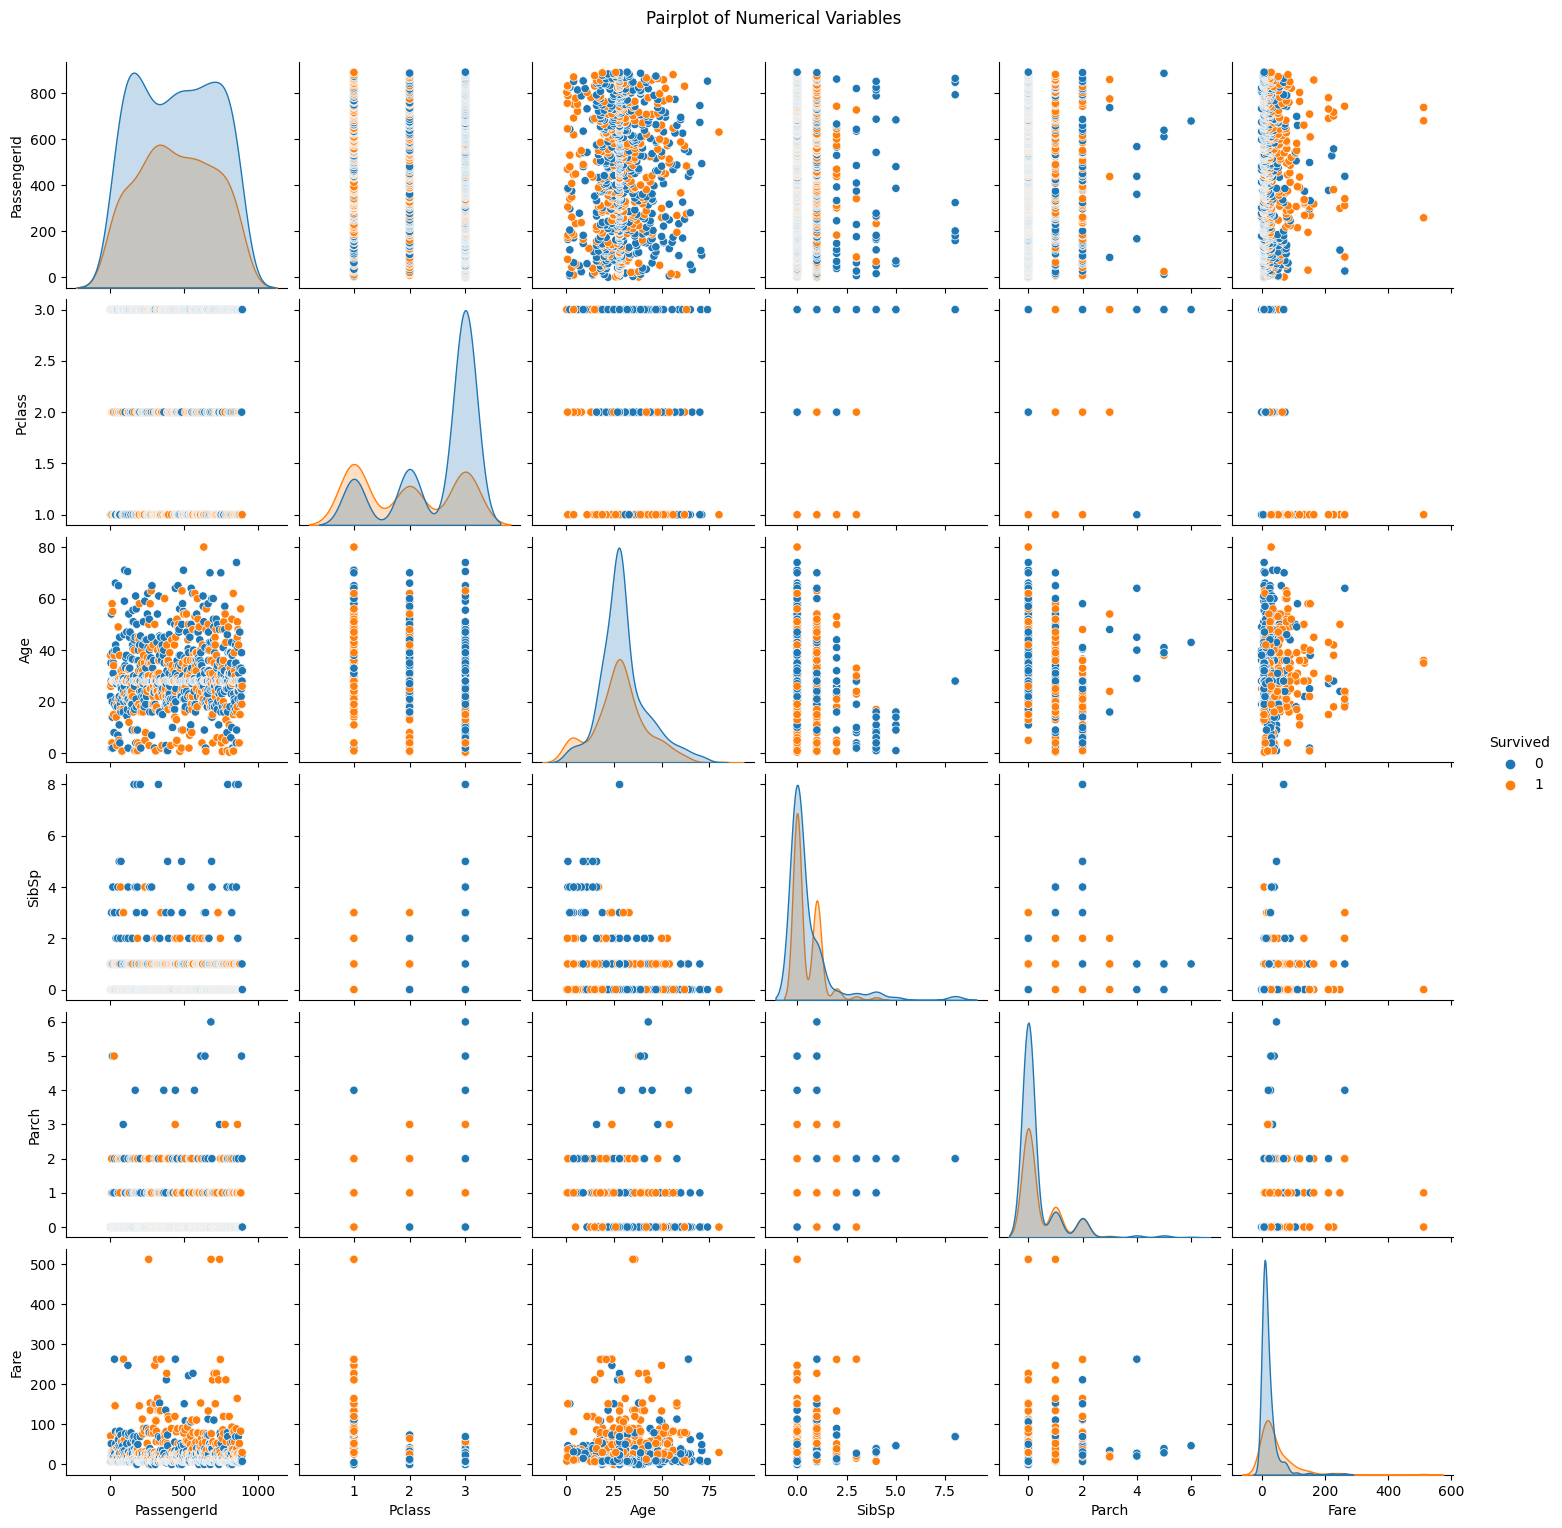

In [16]:
# Pairplot
sns.pairplot(data=dataset, hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

**5. Outlier Detection**

<Axes: >

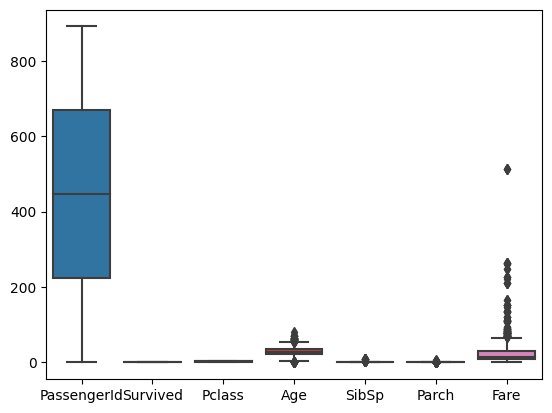

In [17]:
sns.boxplot(dataset)

Text(0.5, 0, 'Fare')

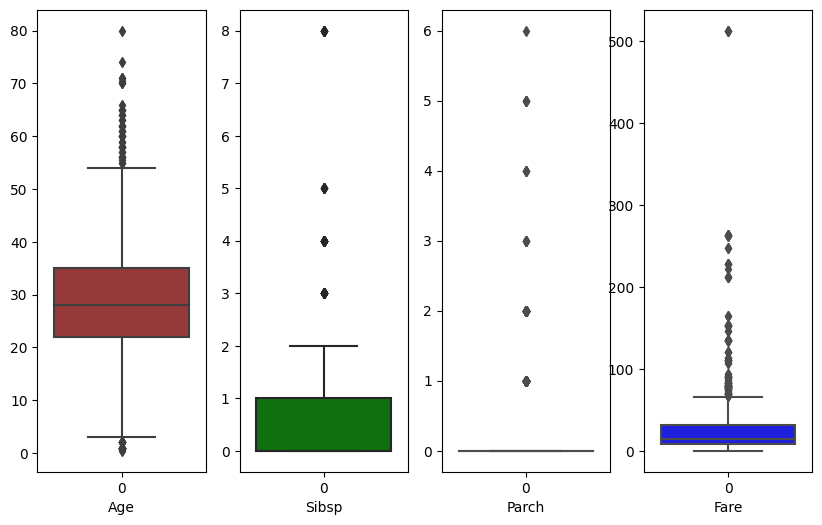

In [18]:
# Outliers are present in Age, SibSp, Parch, Fare classes
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

sns.boxplot(data=dataset['Age'], ax=ax[0], color='brown')
ax[0].set_xlabel('Age')

sns.boxplot(data=dataset['SibSp'], ax=ax[1], color='green')
ax[1].set_xlabel('Sibsp')

sns.boxplot(data=dataset['Parch'], ax=ax[2], color='yellow')
ax[2].set_xlabel('Parch')

sns.boxplot(data=dataset['Fare'], ax=ax[3], color='blue')
ax[3].set_xlabel('Fare')

**6. Splitting Dependent and Independent variables**

In [19]:
x = dataset.drop(['Name','SibSp','Parch','Ticket'],axis=1)
y = dataset['Survived']

In [20]:
x.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**7. Perform Encoding**

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# performing LabelEncoder for 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])
x['Embarked'] = label_encoder.fit_transform(x['Embarked'])

In [26]:
x.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,2
1,2,1,1,0,38.0,71.2833,0
2,3,1,3,0,26.0,7.9250,2
3,4,1,1,0,35.0,53.1000,2
4,5,0,3,1,35.0,8.0500,2


**8. Feature Scaling**

In [27]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.56573646,
        -0.50244517,  0.58595414],
       [-1.72622007,  1.2669898 , -1.56610693, ...,  0.66386103,
         0.78684529, -1.9423032 ],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.25833709,
        -0.48885426,  0.58595414],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ..., -0.1046374 ,
        -0.17626324,  0.58595414],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.25833709,
        -0.04438104, -1.9423032 ],
       [ 1.73010796, -0.78927234,  0.82737724, ...,  0.20276197,
        -0.49237783, -0.67817453]])

**9. Splitting Data into Train and Test**

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [29]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (623, 7)
Shape of x_test:  (268, 7)
Shape of y_train:  (623,)
Shape of y_test:  (268,)
